In [149]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime 
from datetime import datetime
from datetime import date
import seaborn as sns
import scipy.stats as stats

filepath = '/home/disk/sipn/mcmcgraw/data/VRILE/intermediate_data/'
model_name = 'ecmwfsipn'
model_type = 'reforecast'
day_change = 5
max_lead = 30

filename = '{model_name}_{model_type}_d_SIC_{day_change}day_change_lead_time_{max_lead}days_ALL_REGIONS_ALL_ENS.csv'.format(model_name=model_name,
                                                                                                                                 model_type=model_type,
                                                                                                                                 day_change=day_change,
                                                                                                                                 max_lead=max_lead)
#filename2 = '/home/disk/sipn/mcmcgraw/data/VRILE/intermediate_data/ecmwfsipn_reforecast_d_SIC_5day_change_lead_time_30days_ALL_REGIONS_ALL_ENS.csv'
ds_SIC_all = pd.read_csv(filepath+filename)
#print(filepath+filename)
#print(filename2)
#print(ds_SIC_all)
regions = ds_SIC_all['region']
print(regions.iloc[220000])
region_sel = regions.index.where(regions=='panArctic')
ds_SIC = ds_SIC_all
ds_SIC = ds_SIC.iloc[~np.isnan(region_sel),:]

East-Siberian-Beaufort-Chukchi


In [129]:
#Convert initialization and valid dates to datetime objects
init_date = ds_SIC['I (init date)']
ds_init = init_date.to_frame()
#datetime_init = pd.to_datetime(ds_init)
ds_SIC['I (init date)'] = pd.to_datetime(ds_SIC['I (init date)'])
init_date2 = ds_SIC['I (init date)']
ds_SIC['V (valid date)'] = pd.to_datetime(ds_SIC['V (valid date)'])
#
#ds_init = pd.to_datetime(ds_init)

/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


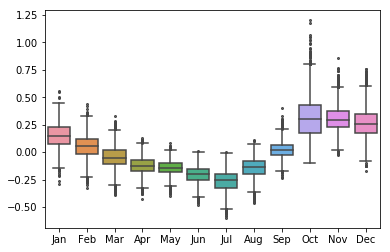

In [130]:
valid_date = ds_SIC['V (valid date)']
#valid_date_adj = valid_date.index.where(valid_date.dt.year > 1999)
#valid_date = valid_date.where(~np.isnan(valid_date_adj))
#print(d_SIC)
#ds_SIC = ds_SIC.where(~pd.isna(valid_date_adj))
dSI = ds_SIC['d_SIC (V - I)']
#dSI = dSI.where(~np.isnan(valid_date_adj))
#print(mon_sel_ind)
mon_ind = np.arange(1,13)
mon_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
d_SIC_mon = pd.DataFrame(columns=mon_names)
#print(d_SIC_mon.shape)
for imon in mon_ind:
 #   print(imon)
    mon_sel_ind = valid_date.index.where(valid_date.dt.month == imon)# & valid_date.dt.year > 1999)
    #select only d_SIC values where valid date is in that month
    d_SIC_mon_sel = dSI.where(~np.isnan(mon_sel_ind))
    #print(d_SIC_mon_sel)
    save_ind = imon-1
    mon_str = mon_names[imon-1]
    #save_ind = str(save_ind)
    d_SIC_mon[mon_str] = d_SIC_mon_sel
#    if imon == 1:
#        d_SIC_mon = d_SIC_mon_sel
#    else:
 #       d_SIC_mon = np.vstack((d_SIC_mon,d_SIC_mon_sel))
#print(d_SIC_mon)    
medianprops = {'color': 'blue', 'linewidth': 2}
boxprops = {'color': 'black','linestyle':'-', 'linewidth': 3}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 3}
flierprops = {'color': 'black', 'marker': 'o', 'markersize': 1, 'markeredgewidth': 2}
#
#d_SIC_mon_sel.boxplot()
#fig1 = plt.figure()
#ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
#ax1.boxplot(np.transpose(d_SIC_mon[~np.isnan(d_SIC_mon)]),medianprops=medianprops,boxprops=boxprops,
#                        whiskerprops=whiskerprops,capprops=capprops,
#                        flierprops=flierprops)
ax = sns.boxplot(data=d_SIC_mon,flierprops=flierprops)

In [67]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

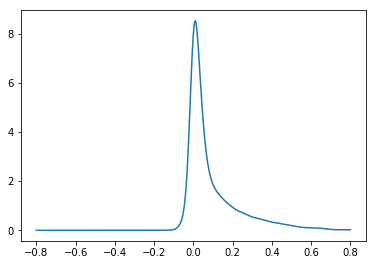

In [92]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
bins = np.linspace(-0.8,0.8,1000)
d_SIC_test = d_SIC_mon.iloc[1:,9]
H_lead = stats.gaussian_kde(d_SIC_test[~np.isnan(d_SIC_test)])
H_lead_plot = H_lead.evaluate(bins)
ax2.plot(bins,H_lead_plot)

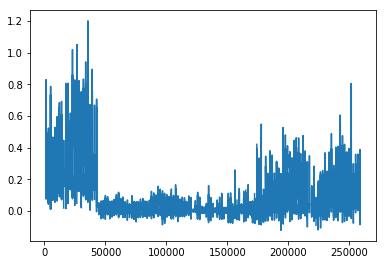

In [93]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])
plt.plot(d_SIC_test)